# Исследование отчетов об уровне счастья в странах мира

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 17,5

# 1. Подготовка данных

Для моего исследования я объединю результаты отчетов за каждый год в один датафрейм, для этого необходимо привести их к общему виду. Я избавлюсь от столбцов, которые не понадобятся в исследовании, добавлю колонку с указанием года отчета и приведу названия остальных колонок к единообразию. В некоторых отчетах отсутствует колонка с указанием региона, а также отличаются варианты названий нескольких стран. Это также необходимо исправить.

In [2]:
df2015 = pd.read_csv(r'C:\Users\79111\Notebooks\5. Статистика в Python\World Happiness Report\2015.csv')
df2016 = pd.read_csv(r'C:\Users\79111\Notebooks\5. Статистика в Python\World Happiness Report\2016.csv')
df2017 = pd.read_csv(r'C:\Users\79111\Notebooks\5. Статистика в Python\World Happiness Report\2017.csv')
df2018 = pd.read_csv(r'C:\Users\79111\Notebooks\5. Статистика в Python\World Happiness Report\2018.csv')
df2019 = pd.read_csv(r'C:\Users\79111\Notebooks\5. Статистика в Python\World Happiness Report\2019.csv')

In [3]:
df2015['Year'] = 2015
df2015 = df2015.drop(['Standard Error', 'Dystopia Residual'], axis=1)
df2015.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [4]:
df2016['Year'] = 2016
df2016 = df2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1)
df2016.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [5]:
df2017['Year'] = 2017
df2017 = df2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1)
df2017 = df2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                                'Happiness.Score': 'Happiness Score',
                                'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                                'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                                'Trust..Government.Corruption.': 'Trust (Government Corruption)'})
df2017['Country'].replace(['Taiwan Province of China', 'Hong Kong S.A.R., China'], ['Taiwan', 'Hong Kong'], inplace=True)
df2017 = df2017.merge(df2016[['Country', 'Region']], on='Country', how='left')
df2017.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017,Western Europe


In [6]:
df2018['Year'] = 2018
df2018 = df2018.rename(columns={'Country or region': 'Country',
                                'Overall rank': 'Happiness Rank',
                                'Score': 'Happiness Score',
                                'GDP per capita': 'Economy (GDP per Capita)',
                                'Social support': 'Family',
                                'Healthy life expectancy': 'Health (Life Expectancy)',
                                'Freedom to make life choices': 'Freedom',
                                'Perceptions of corruption': 'Trust (Government Corruption)'})
df2018['Country'].replace(['Trinidad & Tobago', 'Northern Cyprus'], ['Trinidad and Tobago', 'North Cyprus'], inplace=True)
df2018 = df2018.merge(df2016[['Country', 'Region']], on='Country', how='left')
df2018.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018,Western Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018,Western Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018,Western Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018,Western Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018,Western Europe


In [7]:
df2019['Year'] = 2019
df2019 = df2019.rename(columns={'Country or region': 'Country',
                                'Overall rank': 'Happiness Rank',
                                'Score': 'Happiness Score',
                                'GDP per capita': 'Economy (GDP per Capita)',
                                'Social support': 'Family',
                                'Healthy life expectancy': 'Health (Life Expectancy)',
                                'Freedom to make life choices': 'Freedom',
                                'Perceptions of corruption': 'Trust (Government Corruption)'})
df2019['Country'].replace(['Trinidad & Tobago', 'Northern Cyprus', 'North Macedonia'], ['Trinidad and Tobago', 'North Cyprus', 'Macedonia'], inplace=True)
df2019 = df2019.merge(df2015[['Country', 'Region']], on='Country', how='left')
df2019.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe


In [8]:
df = pd.concat([df2015, df2016, df2017, df2018, df2019])
print(df.shape)
df.head()

(782, 11)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## Итоговый датафрейм

После объединения отчетов в один датафрейм для большей объективности исследования необходимо оставить только те страны, которые встречаются в каждом отчете. То есть в итоговом датафрейме должно быть по 5 строк с данными для каждой страны.

In [9]:
counts = df['Country'].value_counts()
df = df[~df['Country'].isin(counts[counts < 5].index)].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        730 non-null    object 
 1   Region                         730 non-null    object 
 2   Happiness Rank                 730 non-null    int64  
 3   Happiness Score                730 non-null    float64
 4   Economy (GDP per Capita)       730 non-null    float64
 5   Family                         730 non-null    float64
 6   Health (Life Expectancy)       730 non-null    float64
 7   Freedom                        730 non-null    float64
 8   Trust (Government Corruption)  729 non-null    float64
 9   Generosity                     730 non-null    float64
 10  Year                           730 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 62.9+ KB


## Пропуски

В итоговом датафрейме имеется одно пропущенное значение в колонке `Trust (Government Corruption)`. Этот показатель не указан для ОАЭ в одной из строчек. Я заполню пропуск средним арифметическим из четырех других известных значений `Trust (Government Corruption)` для ОАЭ.

In [10]:
df[df['Trust (Government Corruption)'].isna()]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
457,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [11]:
df = df.fillna(df[df['Country'] == 'United Arab Emirates']['Trust (Government Corruption)'].mean())

In [12]:
df[df['Country'] == 'United Arab Emirates']

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.427270,1.12575,0.809250,0.641570,0.385830,0.264280,2015
172,United Arab Emirates,Middle East and Northern Africa,28,6.573,1.573520,0.87114,0.729930,0.562150,0.355610,0.265910,2016
312,United Arab Emirates,Middle East and Northern Africa,21,6.648,1.626343,1.26641,0.726798,0.608345,0.324490,0.360942,2017
457,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096000,0.77600,0.670000,0.284000,0.311982,0.186000,2018
604,United Arab Emirates,Middle East and Northern Africa,21,6.825,1.503000,1.31000,0.825000,0.598000,0.182000,0.262000,2019


# 2. Исследование данных

In [13]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,76.257534,5.440066,0.944199,1.096272,0.635781,0.414798,0.124274,0.219072,2017.000000
std,44.796133,1.114953,0.395913,0.321454,0.234896,0.147851,0.107065,0.123804,1.415183
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,37.250000,4.559000,0.658550,0.881437,0.500583,0.312082,0.052940,0.129822,2016.000000
50%,75.000000,5.427000,1.007438,1.142972,0.669130,0.432056,0.088507,0.201917,2017.000000
75%,115.000000,6.261500,1.251350,1.350750,0.814523,0.531288,0.154338,0.280958,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


## Составляющие факторы уровня счастья

Посмотрим каким образом выражена зависимость уровня счастья от составляющих факторов, таких как ВВП на душу населения, продолжительность жизни, уровень доверия к государству и других.

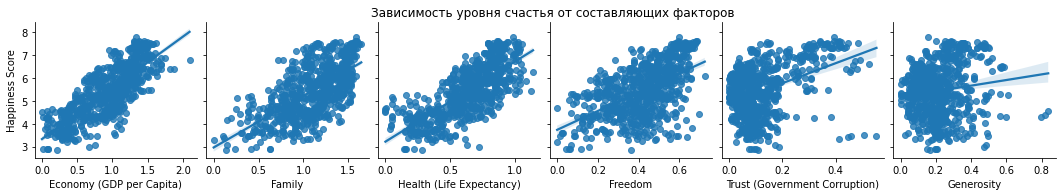

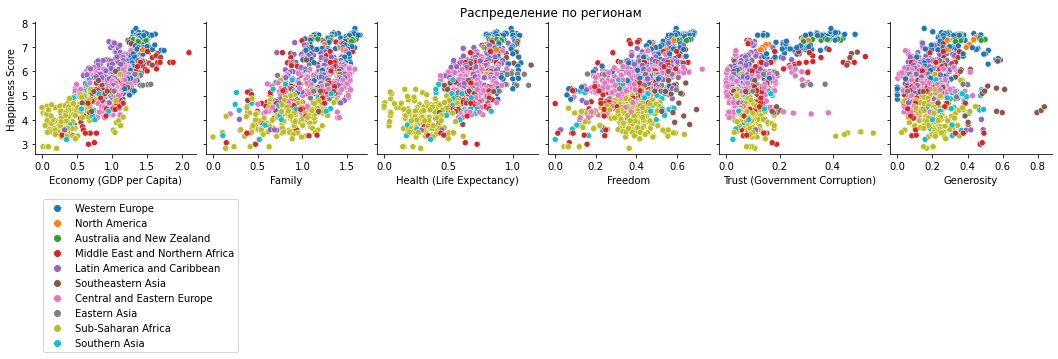

In [14]:
sns.pairplot(df, kind='reg',
             x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity'],
             y_vars=['Happiness Score'])
plt.title('Зависимость уровня счастья от составляющих факторов', x=-2.1)

sns.pairplot(df, hue='Region',
             x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity'],
             y_vars=['Happiness Score'])._legend.remove()
plt.title('Распределение по регионам', x=-2.1)

plt.legend(bbox_to_anchor=(-4, -0.3))
plt.show()

По углу наклона линии регрессии на точечных диаграммах можно заметить, что наиболее сильно выражена зависимость измеренного уровня счастья от уровня ВВП `Economy (GDP per Capita)` и продолжительности жизни `Health (Life Expectancy)` в стране. Достаточно сильно, но все-таки в меньшей степени выражена зависимость от качества социальных связей `Family` и уровня свободы `Freedom`. Наименее выражена зависимость от степени распространиения благотворительности в стране `Generosity`.

На мой взгляд самую интересную форму имеет распределение уровня доверия к государству `Trust (Government Corruption)`. В странах с низким и средним уровнем счастья как правило невысокая степень доверия к власти, и определенной зависимости между этими показателями скорее нет. Но в странах с высоким уровнем счастья можно наблюдать большой разброс значений по уровню доверия к государству. Пожалуй это может говорить о многообразии мнений относительно политики внутри общества в развитых странах.

На точечных диаграммах, показывающих распределение по регионам видна зависимость уровня счастья от части света. Легко заметить большую плотность значений у нижней границы для Тропической Африки `Sub-Saharan Africa`, а также большой разброс значений для стран Ближнего Востока и Северной Африки `Middle East and Northern Africa`, что в целом может говорить о степени однородности уровня жизни в этих регионах. Подробнее я исследую это чуть ниже.

Мое внимание на нижней диаграмме `Trust (Government Corruption)` особенно привлекли пять желтых точек справа у нижней границы, похожих на выбросы. Они говорят о нетипично высоком уровень доверия к государству для стран с низким уровнем счастья. Оказалось, что все пять из этих точек относятся к Руанде на протяжении всего периода проведения отчетов.

In [15]:
df[df['Region'] == 'Sub-Saharan Africa'].sort_values(by='Trust (Government Corruption)', ascending=False).head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
141,Rwanda,Sub-Saharan Africa,154,3.465,0.222080,0.773700,0.428640,0.592010,0.55191,0.226280,2015
286,Rwanda,Sub-Saharan Africa,152,3.515,0.328460,0.615860,0.318650,0.543200,0.50521,0.235520,2016
434,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.45522,0.252756,2017
580,Rwanda,Sub-Saharan Africa,151,3.408,0.332000,0.896000,0.400000,0.636000,0.44400,0.200000,2018
727,Rwanda,Sub-Saharan Africa,152,3.334,0.359000,0.711000,0.614000,0.555000,0.41100,0.217000,2019


Международные организации хвалят Руанду за низкий уровень коррупции, особенно по сравнению с соседями. В индексе восприятия коррупции организации Transparency International страна находится на 49 месте (для сравнения — соседняя Уганда на 142, а Бурунди — на 165). Существует специальная должность омбудсмена, который следит за исполнением антикоррупционного законодательства. Все властвующие лица, включая президента, обязаны публично заявлять о своих богатствах и недвижимости. Экономические и политические институты, по оценке специалистов, развиты до высокого уровня. Тем не менее наблюдается от года к году заметное снижение уровня доверия людей к власти.

Далее на примере двух регионов посмотрим каким образом в них распределены значения составляющих факторов уровня счастья. Я взял два сопоставимых по количеству стран регионов: Западную Европу `Western Europe` и страны Ближнего Востока и Северной Африки `Middle East and Northern Africa`.

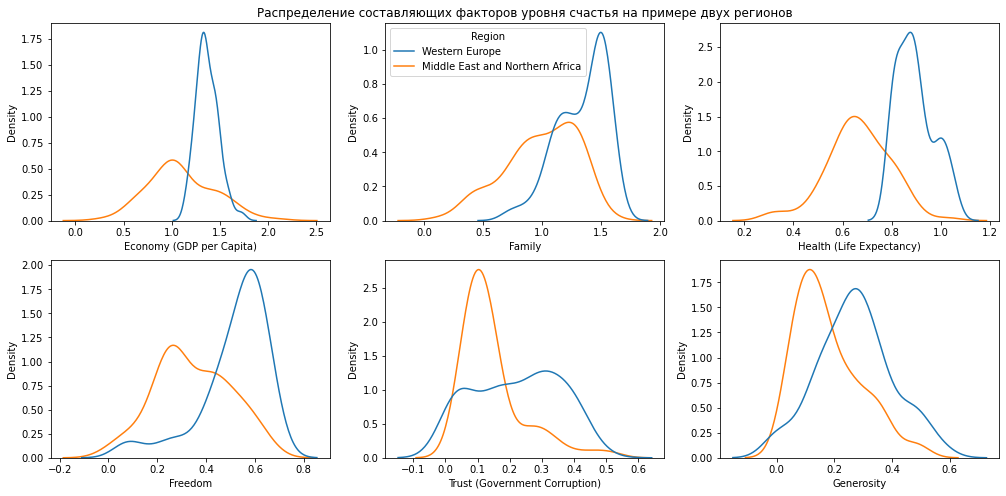

In [16]:
comparison_df = df[df['Region'].isin(['Middle East and Northern Africa', 'Western Europe'])]
fig, axs = plt.subplots(2, 3, figsize=(17, 8))

sns.kdeplot(data=comparison_df, x='Economy (GDP per Capita)', hue='Region', ax=axs[0, 0], legend=False)
sns.kdeplot(data=comparison_df, x='Family', hue='Region', ax=axs[0, 1])
sns.kdeplot(data=comparison_df, x='Health (Life Expectancy)', hue='Region', ax=axs[0, 2], legend=False)
sns.kdeplot(data=comparison_df, x='Freedom', hue='Region', ax=axs[1, 0], legend=False)
sns.kdeplot(data=comparison_df, x='Trust (Government Corruption)', hue='Region', ax=axs[1, 1], legend=False)
sns.kdeplot(data=comparison_df, x='Generosity', hue='Region', ax=axs[1, 2], legend=False)

plt.title('Распределение составляющих факторов уровня счастья на примере двух регионов', x=-0.7, y=2.2)
plt.show()

Для всех составляющих факторов, кроме `Generosity` сглаженные графики распределений по рассматриваемым регионам заметно отличаются друг от друга. Особенно я отмечу фактор уровня ВВП `Economy (GDP per Capita)`. В Западной Европе плотность распределения этого фактора очень высокая, практически все страны в регионе относятся к развитым, отсутствуют бедные страны. В странах MENA ситуация прямо противоположная, разброс значений очень большой, присутствуют как представители бедных государств Северной Африки, так и богатейшие нефтедобывающие страны Персидского Залива.

Также мое внимание привлекли кривые для фактора `Trust (Government Corruption)`. Разница между рассматриваемыми регионами разительная. Как я отмечал ранее, в развитых странах плюрализм мнений относительно власти более выражен. Именно из таких стран состоит Западная Европа, и мы наблюдаем практически плато в распределении значений для фактора доверия к государству.

## Распределение уровня счастья

Я уже отметил высокую степень размаха уровня счастья в странах Ближнего Востока и Северной Африки `Middle East and Northern Africa`. Интересно проверить подтвердится ли эта гипотеза при рассмотрении диаграмм размаха "ящик с усами" для всех регионов.

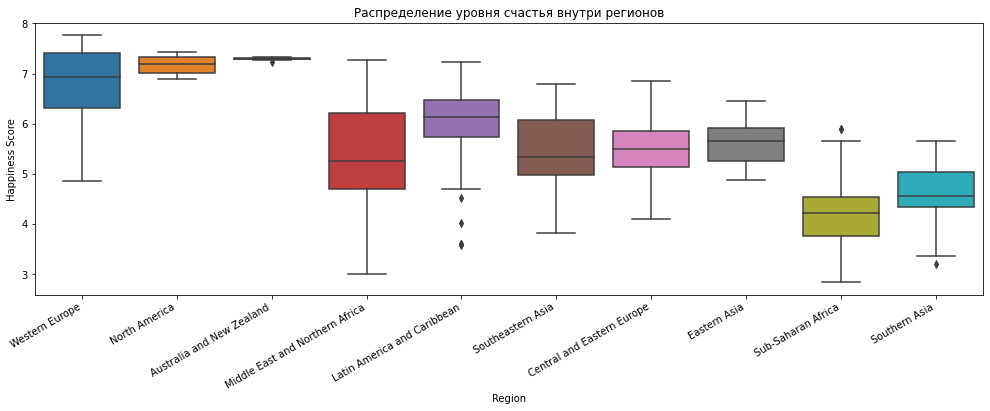

In [17]:
g = sns.boxplot(x='Region', y='Happiness Score', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha="right")
plt.title('Распределение уровня счастья внутри регионов')
plt.show()

Построенная диаграмма действительно показывает, что в странах MENA наибольший размах значений уровня счастья относительно других регионов. Но также видно, что размах большой и в Западной Европе, хотя межквартильный размах этого региона и находится полностью выше аналогичного показателя для стран Ближнего Востока и Северной Африки.

Обращают на себя внимание несколько нижних выбросов в регионе Латинская Америка и Карибский бассейн `Latin America and Caribbean`. С учетом этих выбросов общий размах значений для этого региона, пожалуй, входит в тройку лидеров. Наличие таких выбросов говорит о том, что в регионе есть одна, или несколько стран, уровень счастья в которых сильно ниже, чем в целом по региону. С помощью фильтрации и сортировки выясняется, что этой "несчастной" страной является Гаити.

In [18]:
df[df['Region'] == 'Latin America and Caribbean'].sort_values(by='Happiness Score').head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
577,Haiti,Latin America and Caribbean,148,3.582,0.31500,0.71400,0.289000,0.02500,0.104000,0.392000,2018
722,Haiti,Latin America and Caribbean,147,3.597,0.32300,0.68800,0.449000,0.02600,0.110000,0.419000,2019
429,Haiti,Latin America and Caribbean,145,3.603,0.36861,0.64045,0.277321,0.03037,0.099872,0.489204,2017
273,Haiti,Latin America and Caribbean,136,4.028,0.34097,0.29561,0.274940,0.12072,0.144760,0.479580,2016
110,Haiti,Latin America and Caribbean,119,4.518,0.26673,0.74302,0.388470,0.24425,0.171750,0.461870,2015


Гаити — одна из самых бедных и нестабильных стран мира; самая бедная страна Америки, постоянно страдающая от голода, стихийных бедствий и государственных переворотов. В своём отчете за март 2019 года Миссия ООН по поддержке правосудия в Гаити отметила, что «условия жизни гаитянского населения всё больше ухудшаются». В целом по стране, 5,5 % и 27 % людей находятся в чрезвычайных и продовольственных кризисных ситуациях, соответственно; 2,26 млн человек классифицируются как «люди, не имеющие продовольственной безопасности и нуждающиеся в гуманитарной помощи в связи с этим.

Комментарий миссии ООН подтверждается динамикой уровня счастья в исследуемых отчетах. С 2015 по 2019 год в Гаити он снизился более чем на 20% с 4.518 до 3.597 баллов.

## Динамика уровня счастья

В продолжение рассмотрения ситуации в Гаити предлагаю исследовать как за период составления отчетов с 2015 по 2019 годы менялся уровень счастья в наиболее "несчастных" странах. Для этого я исключу наиболее "счастливые" регионы `['Australia and New Zealand', 'North America', 'Western Europe']`, а в оставшихся регионах буду рассматривать значения по первому квартилю, то есть нижние 25%.

In [19]:
exclude = ['Australia and New Zealand', 'North America', 'Western Europe']
unhappy25 = df[~df['Region'].isin(exclude)].pivot_table(index='Year', columns='Region', values='Happiness Score',
                                                        aggfunc=lambda x: np.percentile(x, 25))
unhappy25.loc['Change in %'] = unhappy25.apply(lambda x: round((x.iloc[4] / x.iloc[0] - 1) * 100, 1))
unhappy25 = unhappy25.sort_values(axis=1, by=unhappy25.index[4], ascending=False)
unhappy25

Region,Latin America and Caribbean,Eastern Asia,Central and Eastern Europe,Southeastern Asia,Middle East and Northern Africa,Southern Asia,Sub-Saharan Africa
Year,,,,,,,
2015,5.828,5.22350,4.959,4.88150,4.7005,4.3925,3.6740
2016,5.743,5.29825,5.145,4.89450,4.7835,4.4095,3.7170
2017,5.493,5.32275,5.175,4.94175,4.7550,4.3775,3.7115
2018,5.681,5.29200,5.185,4.92800,4.6495,4.3305,3.8690
2019,5.779,5.32125,5.261,5.05625,4.5045,4.1905,4.0300
Change in %,-0.800,1.90000,6.100,3.60000,-4.2000,-4.6000,9.7000


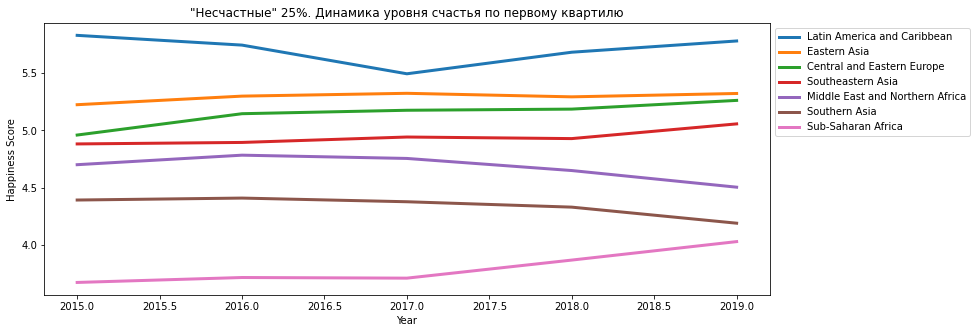

In [20]:
unhappy25.iloc[:-1].plot(title='"Несчастные" 25%. Динамика уровня счастья по первому квартилю',
                         ylabel='Happiness Score', figsize=(13, 5), lw=3)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Динамика по регионам разная. Наиболее сильный прирост уровня счастья, на 9,7% наблюдается в Тропической Африке `Sub-Saharan Africa`, однако она по-прежнему остается самым "несчастным" регионом. Но есть регионы, в которых самые "несчастные" 25% стран стали еще несчастнее. Это уже знакомые нам `Middle East and Northern Africa`, а также лидирующая по этому показателю Южная Азия `Southern Asia`, где падение составило -4,6%. Рассмотрим этот регион подробнее, чтобы узнать идет ли речь о всеобщем снижении счастья, или же ситуация не является однородной.

In [21]:
southern_asia = df[df['Region'] == 'Southern Asia'].pivot_table(
    index='Country', columns='Year', values='Happiness Score', aggfunc='mean')
southern_asia['Change in %'] = round((southern_asia.iloc[ :, -1] / southern_asia.iloc[ :, 0] - 1) * 100, 1)
southern_asia = southern_asia.sort_values(by=southern_asia.columns[4], ascending=False)
southern_asia

Year,2015,2016,2017,2018,2019,Change in %
Country,,,,,,
Pakistan,5.194,5.132,5.269,5.472,5.653,8.8
Bhutan,5.253,5.196,5.011,5.082,5.082,-3.3
Nepal,4.514,4.793,4.962,4.880,4.913,8.8
Bangladesh,4.694,4.643,4.608,4.500,4.456,-5.1
Sri Lanka,4.271,4.415,4.440,4.471,4.366,2.2
India,4.565,4.404,4.315,4.190,4.015,-12.0
Afghanistan,3.575,3.360,3.794,3.632,3.203,-10.4


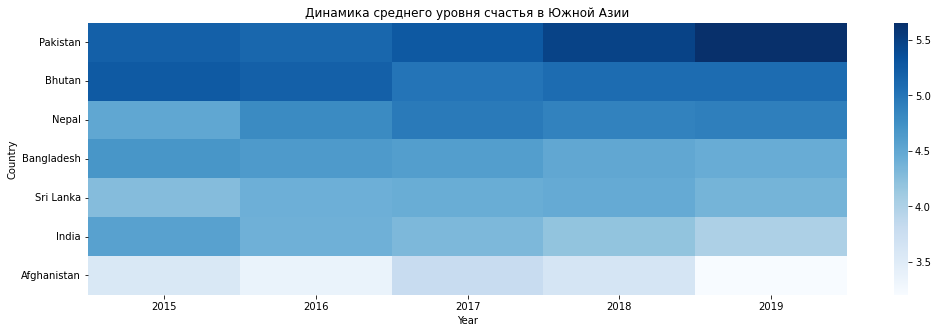

In [22]:
sns.heatmap(southern_asia.iloc[:, :-1], cmap='Blues')
plt.title('Динамика среднего уровня счастья в Южной Азии')
plt.show()

На построенной тепловой карте видно, что по итогам отчета 2019 года самый низкий уровень счастья в регионе наблюдается в Индии и Афганистане. Оказывается, что две эти страны также показывают и самое высокое падение по этому показателю за период проведения отчетов. За четыре года в Индии уровень счастья снизился на 12%, а в Афганистане на 10,4%. При этом уровень счастья в Пакистане, Непале и на Шри-Ланке вырос. Исходя из этого можно сделать вывод, что в Южной Азии действительно наблюдается заметное снижение уровня счастья в наиболее "несчастных" странах, относительно своих соседей по региону.